In [ ]:
import pandas
import numpy
import matplotlib.pyplot as plt

# h0 -  no association between gender and marks obtained in exam
# ha -  there is an association between gender and marks obtained in exam

In [ ]:
data = pandas.read_csv('/content/StudentStatistics.csv', sep =';')
data.head()

,RespNr,Location,OAA_ObjCourse,OAA_ObjClass,OAA_CourseExec,OAA_RelActObj,OAA_RelActExa,OAA_RelObjExa,OAA_LearProcAct,OAA_LearProcPrep,...,Mix_IntDiscus,Mix_IntPrep,Mix_IntExcel,Over_Grade,Gen_Gender,Gen_Age,Gen_SecSchool,Gen_Classes,Gen_NumberSubj,Gen_Time
0,1.0,Rotterdam,Fully Disagree,Fully Disagree,Fully Disagree,Disagree,Fully Disagree,Fully Disagree,Fully Disagree,Fully Disagree,...,Not at all,not so much,not so much,20.0,Female,22.0,NaN,NaN,Fully agree,20 < 30
1,2.0,Haarlem,Disagree,Disagree,NaN,Fully Disagree,Neither disagree nor agree,Agree,Disagree,Neither disagree nor agree,...,not so much,somewhat,somewhat,50.0,Male,NaN,The Netherlands,6.0,Disagree,10 < 20
2,3.0,Diemen,Fully agree,Fully agree,Agree,Fully agree,Fully agree,Fully agree,Fully agree,Agree,...,Very much,somewhat,somewhat,80.0,Male,37.0,Africa,7.0,Agree,10 < 20
3,4.0,Rotterdam,Fully Disagree,Neither disagree nor agree,Disagree,Neither disagree nor agree,Neither disagree nor agree,Fully Disagree,Fully Disagree,Neither disagree nor agree,...,NaN,neutral,neutral,15.0,Female,24.0,The Netherlands,6.0,Agree,10 < 20
4,5.0,Haarlem,Disagree,Agree,Fully Disagree,Neither disagree nor agree,Fully agree,Fully agree,Neither disagree nor agree,Fully agree,...,Not at all,somewhat,Very much,40.0,Male,19.0,The Netherlands,7.0,Fully agree,10 < 20


In [ ]:
data.groupby('Gen_Gender')['Over_Grade'].mean()

,Over_Grade
Gen_Gender,
Female,53.727273
Male,59.766667


In [ ]:
data .groupby('Gen_Gender')['Over_Grade'].std()

,Over_Grade
Gen_Gender,
Female,26.382157
Male,19.383042


In [ ]:
maleScores = data['Over_Grade'][data['Gen_Gender'] == 'Male'].dropna()
femaleScores = data['Over_Grade'][data['Gen_Gender'] == 'Female'].dropna()

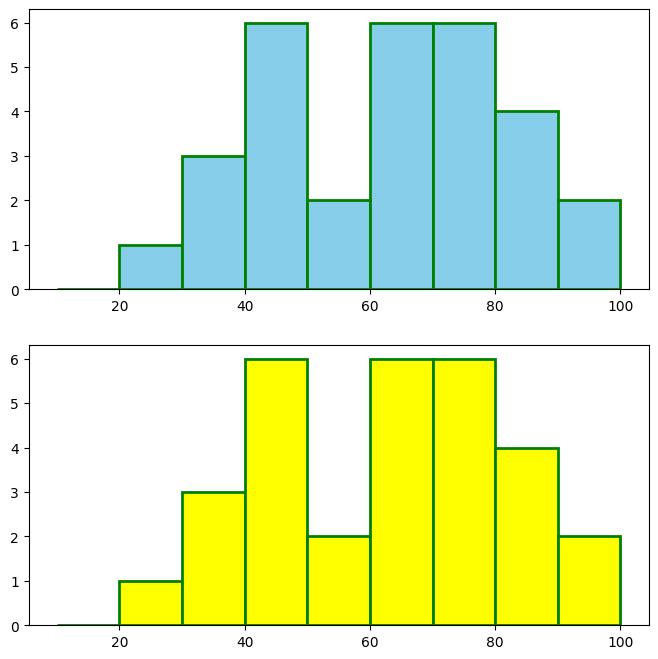

In [ ]:
#histogram
plt.figure(1, figsize=(8,8))

plt.subplot(2,1,1)
plt.hist(maleScores, color='skyblue', lw=2,edgecolor='green' , bins =[10,20,30,40,50,60,70,80,90,100])

plt.subplot(2,1,2)
plt.hist(maleScores, color='yellow', lw=2,edgecolor='green' , bins =[10,20,30,40,50,60,70,80,90,100])

plt.show()

In [ ]:
from scipy.stats import ttest_ind

#Student test
#print(ttest_ind(maleScores, femaleScores))

#Welch test
print(ttest_ind(maleScores, femaleScores, equal_var = False))

In [ ]:
pvalue = 0.4991001245520197
if pvalue < 0.05:
  print('H0 is rejected')
else:
  print('H0 cannot be rejected')

H0 cannot be rejected


In [ ]:
# h0 -  no association between gender and marks obtained in exam

In [ ]:
#Effect size Cohen d_s

!pip install https://raw.githubusercontent.com/stikpet/stikpetP/main/stikpetP.tar.gz
import stikpetP as ps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.6/253.6 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stikpetP: filename=stikpetP-0.0.3-py3-none-any.whl size=422074 sha256=31092e97d49c152ff18e70883c6f92d0df23388eae32d2cf7525716d027e3a09
  Stored in directory: /tmp/pip-ephem-wheel-cache-2t1g2nxk/wheels/65/58/9c/d9a9e2185c9bb20de121369a2b0f5452a2a582c4b4df87e446
Successfully built stikpetP


In [ ]:
ps.es_hedges_g_is(data['Gen_Gender'], data['Over_Grade'])

,g,version
0,0.282253,Cohen ds (Hedges g (uncorrected)


In [ ]:
d_s = 0.282253

if d_s < 0.01:
  print('negligible')
elif d_s < 0.2:
  print('very small')
elif d_s < 0.5:
  print('small')
elif d_s < 0.8:
  print('medium')
elif d_s < 1.2:
  print('large')
elif d_s < 2:
  print('very large')
else:
  print('huge')

small


Welch t test applied on the data did not find any evidence to reject the hypothesis that there is no evidence between gender and marks obtained (p = 0.49).

Further the Cohen d effect size suggests the strength of association to be small(d = 0.28)